# Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA por sus siglas en inglés), es una técnica de análisis de datos que se usa para la reducción dimensional. El objetivo principal de PCA es encontrar un conjunto reducido de ejes, en un espacio multidimensional, donde que la dispersión de los datos es máxima.

Los pasos para hacer el PCA a un conjunto de $n$ observaciones de $p$ variables son los siguientes:

1. Se construye la matriz $X$ de $n\times p$, en la que cada fila corresponde a una observación y cada columna a una variable.
2. Se calcula la matriz de covarianza $C$:
$$
C = \frac{1}{n-1}  X^T  X,
$$
donde $X^T$ es la matriz traspuesta de $X$.
3. Se resuelve la ecuación característica:
$$
|C - \lambda I| = 0,
$$
donde $\lambda$ son los autovalores e $I$ es la matriz identidad. Luego, para cada autovalor $\lambda_i$, encontramos el autovector correspondiente $v_i$ que satisface:
$$
C v_i = λ_i v_i
$$
4. Se ordenan los autovalores de mayor a menor. Los autovectores correspondientes son las componentes principales, donde el primer autovector (asociado al mayor autovalor) es la primera componente principal, y así sucesivamente.
5.  Se eligen las $k$ primeras componentes principales $(k < p)$ para formar una matriz de proyección $W$. Los datos originales se proyectan en el nuevo espacio de menor dimensión $Y = ZW$, donde $Y$ representa a los datos proyectados en el nuevo espacio $k$-dimensional.

La proporción de varianza explicada $V_i$ por cada componente se calcula como:
$$
V_i = \frac{\lambda_i}{\sum_j \lambda_j},
$$
donde la suma en el denominador es sobre todos los autovalores.





## Datos de escritura manuscrita de cifras (MNIST)

Consideramos la base de datos MNIST de datos de escritura manuscrita de dígitos del $0$ al $9$.

Esta base consiste en $70000$ imágenes de $28\times 28=784$ píxeles. Cada pixel toma un valor de escala de grises entre $0\to$ negro y $255\to$ blanco.

Además, cada imagen tiene asociado un dato adicional que corresponde al dígito de la misma.

La matriz $X$ en este caso tiene $n=70000$ filas y $p=784$ columnas.

In [1]:
# Librería de cálculo numérico
import numpy as np
# Librería de graficación
import matplotlib.pyplot as plt
# Librería para el análisis de componentes principales
from sklearn.decomposition import PCA
# Ejemplos de conjuntos de datos
from sklearn.datasets import fetch_openml

In [2]:
# Cargamos el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data.astype('float32') / 255.0  # Normalizamos a 1 los datos de escala de gris
y = mnist.target.astype(int) # Número entero que corresponde al dígito de la imagen

### Filtramos para quedarnos con los dígitos '0' y '1'

In [3]:

mask = (y == 0) | (y == 1)
X_filtrado = X[mask]
y_filtrado = y[mask]

print("Conjunto de datos filtrado: ", X_filtrado.shape[0], " filas y ", X_filtrado.shape[1], " columnas")

Conjunto de datos filtrado:  14780  filas y  784  columnas


In [4]:
# Elegimos una de las imágenes : i
i = 22
# iloc[i] selecciona la imagen i-esima en la base de datos: mnist.data
# to_numpy la convierte al formato numpy
# reshape la convierte en una matriz de 28x28
original_image = X_filtrado.iloc[i].to_numpy().reshape(28, 28)
print("La imagne corresponde al dígito: ", y_filtrado.iloc[i])

La imagne corresponde al dígito:  1


(-0.5, 27.5, 27.5, -0.5)

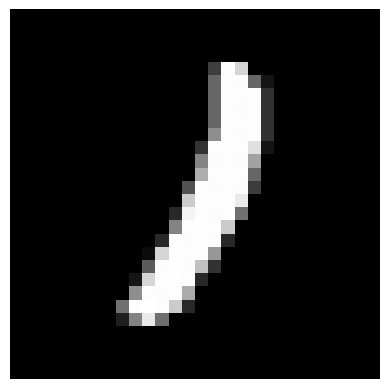

In [5]:
# Graficamos la imagen seleccionada
plt.imshow(original_image, cmap='gray')
plt.axis('off')

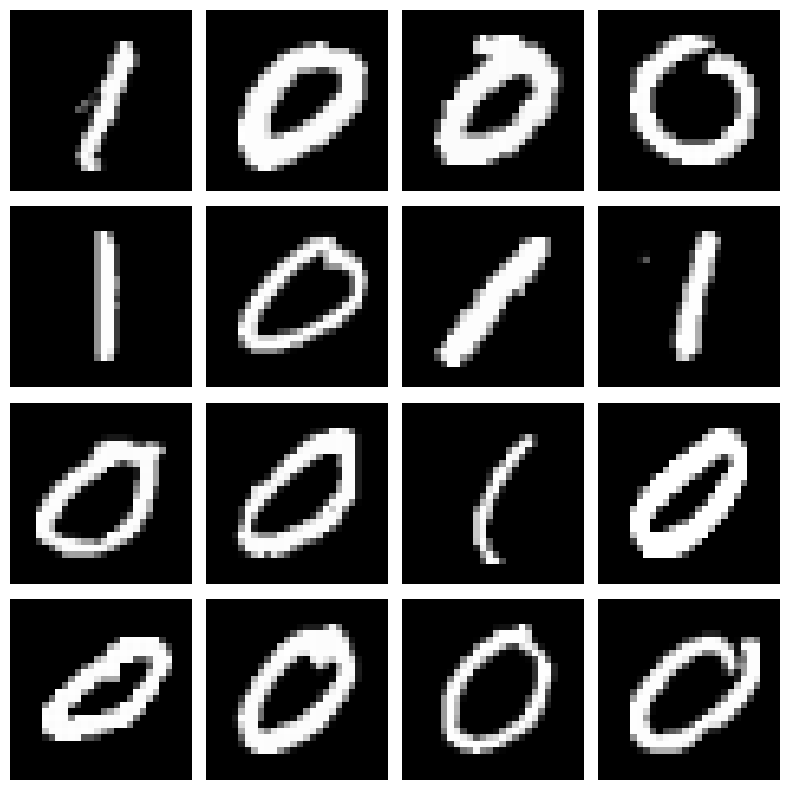

In [6]:
# Exploramos un poco más el conjunto de imágenes
# Creamos una grilla de 4x4 imágenes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))

# Itera sobre la grilla y muestra una imagen en cada una
for i, ax in enumerate(axes.flat):
    # Selecciona una imagen aleatoria del conjunto de datos
    random_index = np.random.randint(0, X_filtrado.shape[0])
    imagen = X_filtrado.iloc[random_index].to_numpy().reshape(28, 28)

    # Muestra la imagen
    ax.imshow(imagen, cmap='gray')
    ax.axis('off')

# Ajusta el espaciado
plt.tight_layout()

# Muestra la figura
plt.show()


In [8]:
# Inicializamos PCA para calcular 5 componentes principales
pca = PCA(n_components=5)

# Proyectamos los datos sobre los cinco ejes obtenidos
X_reducido = pca.fit_transform(X_filtrado)

In [9]:
print("La varianza explicada por cada eje: ", pca.explained_variance_ratio_)
print("La suma de las varianzas explicadas: ", sum(pca.explained_variance_ratio_))


La varianza explicada por cada eje:  [0.3218402  0.0902978  0.08002857 0.05635585 0.03925888]
La suma de las varianzas explicadas:  0.587781297165702


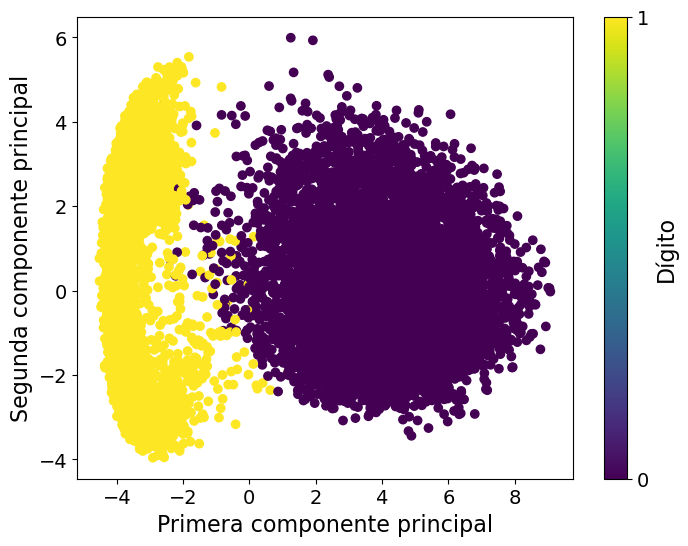

In [10]:
# Graficamos los puntos asociados a los dígitos en el plano de los dos ejes de PCA más importantes
# Usamos la clasificación provista en '0' o '1' para definir el color de los puntos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=y_filtrado, cmap='viridis', alpha=1)
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Dígito', fontsize=16)
plt.xlabel('Primera componente principal', fontsize=16)
plt.ylabel('Segunda componente principal', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#Identificamos los píxels con mayor contribución a la primer componente principal

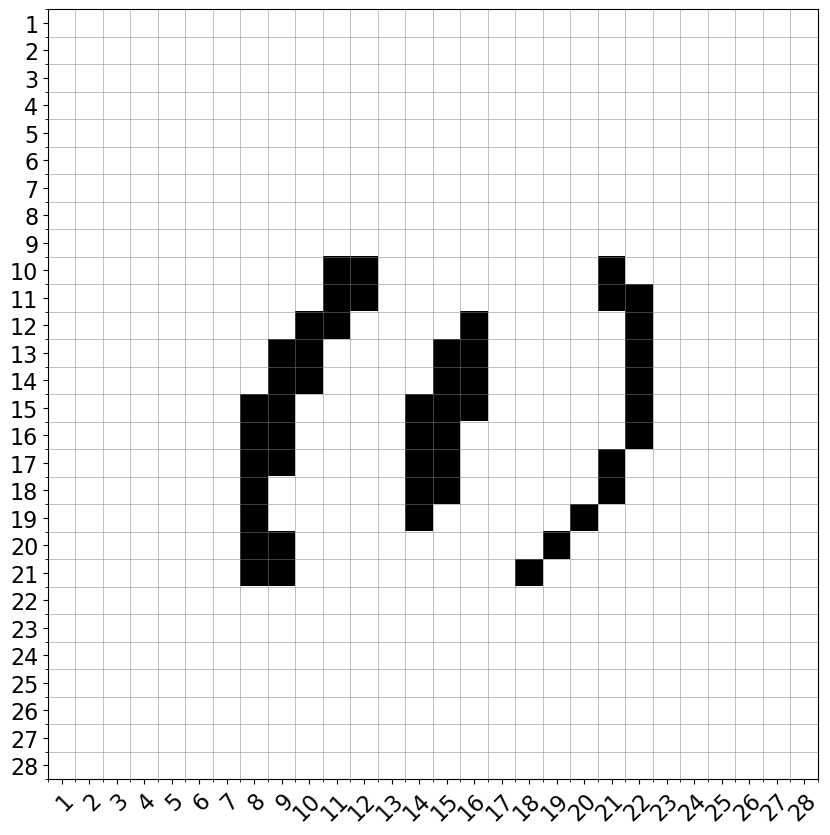

In [11]:
import seaborn as sns # Para graficar

# Seleccionamos los 50 pixels
n_pixels_principales = 50
# Ordenamos las componentes del vector según su amplitud.
pixels_pr_pc1 = np.argsort(np.abs(pca.components_[0]))[-n_pixels_principales:]

pc1_img = np.zeros((28, 28))
for pixel in pixels_pr_pc1:
    pc1_img[pixel // 28, pixel % 28] = 1

# Visualizamos los pixels más relevantes
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(pc1_img, cmap='binary')

ax.set_xticks(np.arange(28))
ax.set_yticks(np.arange(28))
ax.set_xticklabels(range(1, 29))
ax.set_yticklabels(range(1, 29))

# Rotar etiquetas
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax.set_xticks(np.arange(-.5, 28, 1), minor=True)
ax.set_yticks(np.arange(-.5, 28, 1), minor=True)
ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5, alpha=0.7)
ax.tick_params(labelsize=16)  # Eje horizontal
ax.tick_params(labelsize=16)  # Eje vertical




3. Analizar cómo se modifican estos resultados para los dígitos '6' y '9'.

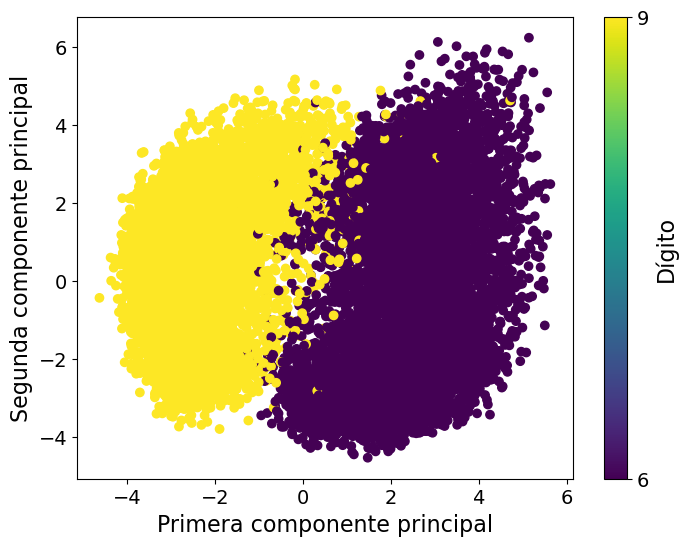

In [12]:
# Graficamos los puntos asociados a los dígitos en el plano de los dos ejes de PCA más importantes
# Usamos la clasificación provista en '6' o '9' para definir el color de los puntos
mask = (y == 6) | (y == 9)
X_filtrado = X[mask]
y_filtrado = y[mask]

pca = PCA(n_components=5)
X_reducido = pca.fit_transform(X_filtrado)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=y_filtrado, cmap='viridis', alpha=1)
cbar = plt.colorbar(scatter, ticks=[6, 9])
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Dígito', fontsize=16)
plt.xlabel('Primera componente principal', fontsize=16)
plt.ylabel('Segunda componente principal', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

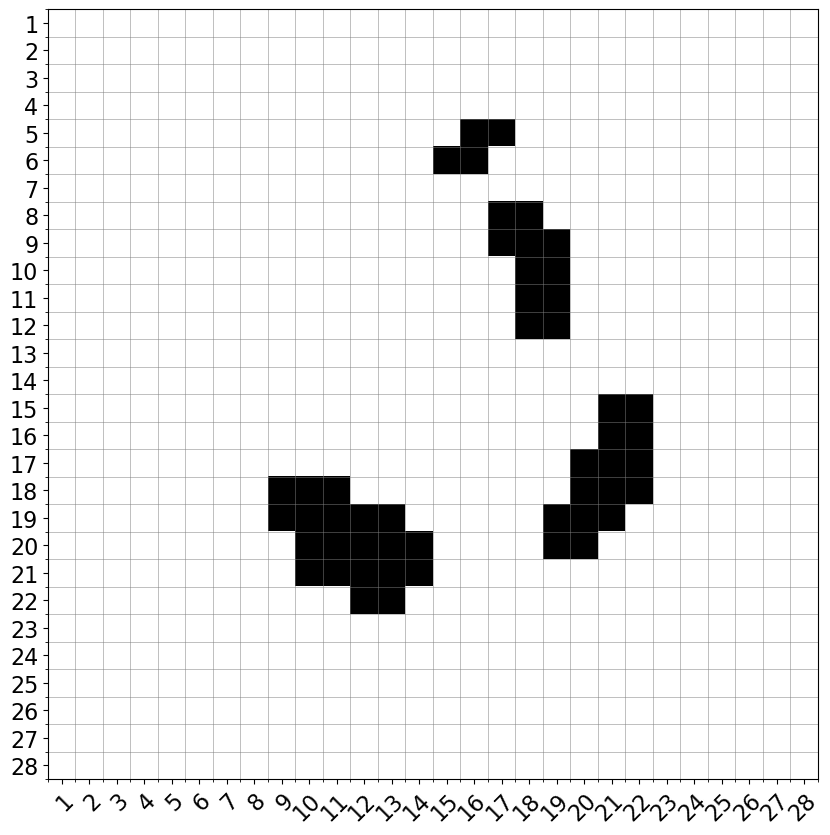

In [13]:
import seaborn as sns # Para graficar

# Seleccionamos los 50 pixels
n_pixels_principales = 50
# Ordenamos las componentes del vector según su amplitud.
pixels_pr_pc1 = np.argsort(np.abs(pca.components_[0]))[-n_pixels_principales:]

pc1_img = np.zeros((28, 28))
for pixel in pixels_pr_pc1:
    pc1_img[pixel // 28, pixel % 28] = 1

# Visualizamos los pixels más relevantes
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(pc1_img, cmap='binary')

ax.set_xticks(np.arange(28))
ax.set_yticks(np.arange(28))
ax.set_xticklabels(range(1, 29))
ax.set_yticklabels(range(1, 29))

# Rotar etiquetas
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax.set_xticks(np.arange(-.5, 28, 1), minor=True)
ax.set_yticks(np.arange(-.5, 28, 1), minor=True)
ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5, alpha=0.7)

ax.tick_params(labelsize=16)  # Eje horizontal
ax.tick_params(labelsize=16)  # Eje vertical




In [14]:
# Cargamos el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data.astype('float32') / 255.0  # Normalizamos a 1 los datos de escala de gris
y = mnist.target.astype(int) # Número entero que corresponde al dígito de la imagen

# Filtramos para quedarnos con los dígitos '0' y '1'
mask = (y == 0) | (y == 1) | (y == 2) | (y == 3) | (y == 4) | (y == 5) | (y == 6) | (y == 7) | (y == 8) | (y == 9)
X_filtrado = X[mask]
y_filtrado = y[mask]

(-0.5, 27.5, 27.5, -0.5)

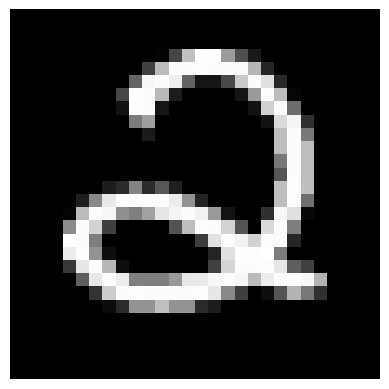

In [15]:
original_image = X_filtrado.iloc[3244].to_numpy().reshape(28, 28)
plt.imshow(original_image, cmap='gray')
plt.axis('off')

In [16]:
indice_imagen=3244
cantidad_max_ejes=64
delta_ejes = 1
# Defino la cantidad de ejes de PCA a utilizar
n_ejes_pca = 1
imagenes_descomprimidas = []
x=[]
while n_ejes_pca<=cantidad_max_ejes:
    # Inicializo PCA para calcular los ejes principales
    pca = PCA(n_components=n_ejes_pca)

    # Proyecto los datos sobre los ejes principales
    X_reducido = pca.fit_transform(X_filtrado)

    # Descomprimo la imagen
    imagenes_descomprimidas.append(pca.inverse_transform(X_reducido[indice_imagen]))
    x.append(n_ejes_pca)
    n_ejes_pca+=delta_ejes


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


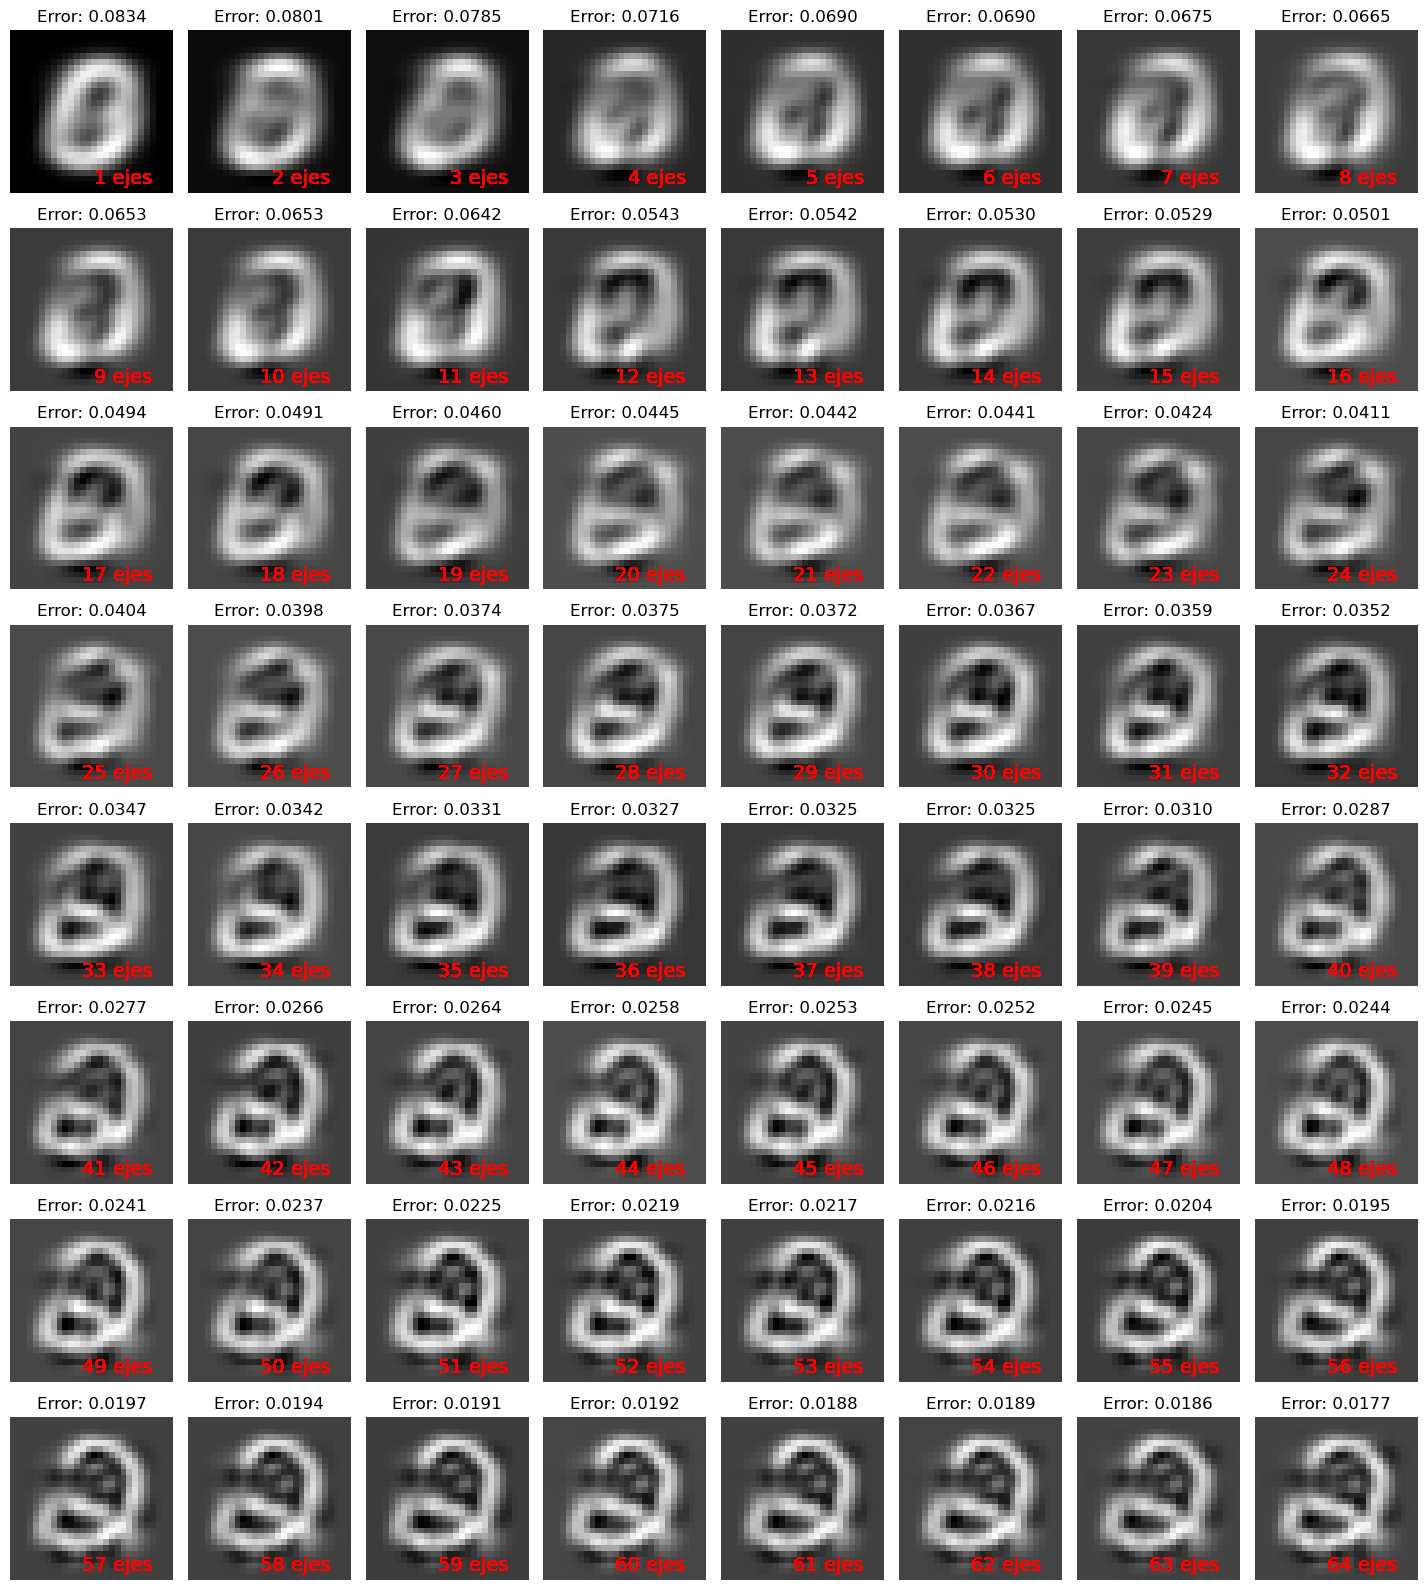

In [17]:
from scipy.optimize import curve_fit

fig, axes = plt.subplots(nrows=int(cantidad_max_ejes/(delta_ejes*8)), ncols=8, figsize=(16, 16))

# Itera sobre la grilla y muestra una imagen en cada una
for i in range(len(imagenes_descomprimidas)):
    imagen = imagenes_descomprimidas[i].reshape(28, 28)

    # Calcula el error de reconstrucción dependiendo del número de ejes utilzados
    reconstruction_errors = []
    for i in range(len(imagenes_descomprimidas)):
        resta=X_filtrado.iloc[indice_imagen].to_numpy().reshape(28,28) - imagenes_descomprimidas[i].reshape(28,28)
        error = np.mean(resta**2)
        reconstruction_errors.append(error)

    # Pongo los errores sobre las imagenes reconstruidas
    for i in range(len(imagenes_descomprimidas)):
        imagen = imagenes_descomprimidas[i].reshape(28, 28)
        ax = axes.flat[i] # Assign the correct axis object to ax
        ax.imshow(imagen, cmap='gray')
        ax.set_title(f"Error: {reconstruction_errors[i]:.4f}")
        ax.text(24, 26, f"{x[i]} ejes", color='red', fontsize=14, ha='right')
        ax.axis('off')

    
    plt.tight_layout()

plt.show()



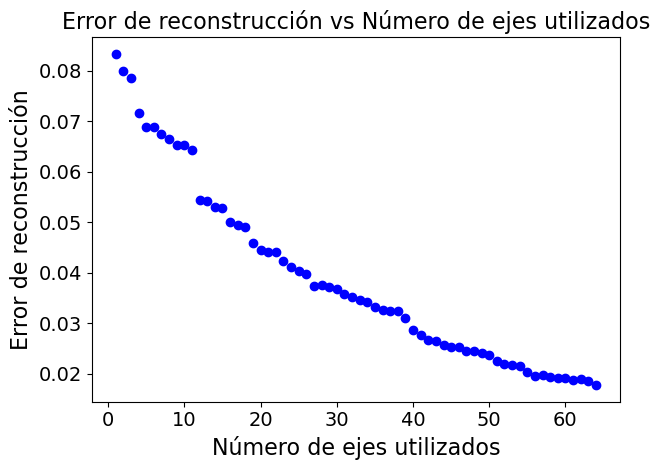

In [18]:
# Grafico el error de reconstrucción en función del número de ejes utilizados
plt.scatter(x, reconstruction_errors, color='blue')
plt.xlabel('Número de ejes utilizados', fontsize=16)
plt.ylabel('Error de reconstrucción', fontsize=16)
plt.title('Error de reconstrucción vs Número de ejes utilizados', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()